In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import pandas as pd

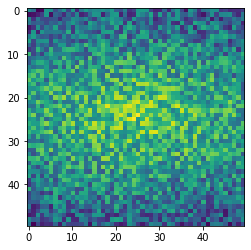

(24.485793468871623, 24.501266572370298)
[[ 2.30639054e+03 -1.13686838e-13  4.77284829e+05  4.40415035e+03]
 [-4.99777997e-12 -1.13259476e+02  4.28946833e+03  1.66821630e+04]
 [ 4.69873314e+05 -1.13882892e+03  9.73567540e+07  2.20457969e+06]
 [ 4.59023262e+03 -1.77153944e+04  2.95828363e+06  4.45285430e+06]]


array([[            nan,             nan,  8.97246833e-02,
         1.72397124e-05],
       [            nan, -2.12916272e-05,  1.67907984e-05,
         1.35973356e-06],
       [ 8.83313941e-02, -4.45785942e-06,  7.93537659e-03,
         3.74162996e-06],
       [ 1.79681173e-05, -1.44395042e-06,  5.02082221e-06,
         1.57364619e-07]])

In [2]:
dims = 50
x, y = np.meshgrid(np.linspace(-1,1,dims), np.linspace(-1,1,dims))
d = np.sqrt((x/2)*(x/2)+y*y)
sigma, mu = 5, -2
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
g += np.random.rand(dims,dims) * 0.1
plt.imshow(g)
plt.show()


M = measure.moments(g)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
print(centroid)
print(measure.moments_central(g, centroid))
measure.moments_normalized(g, 2)

mu = measure.moments_central(g, centroid)
measure.moments_normalized(mu)

[False  True] (50, 50)
[False  True] (180, 180)


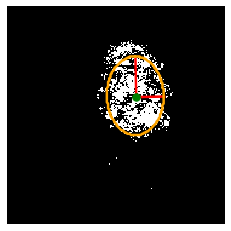

centroid-0                                                          74
centroid-1                                                         106
orientation                                                  0.0193259
major_axis_length                                              65.7469
minor_axis_length                                              46.2545
area                                                              1401
filled_area                                                       1477
convex_area                                                       2821
eccentricity                                                  0.710672
solidity                                                      0.496632
euler_number                                                       -28
convex_image         [[False, False, False, False, False, False, Fa...
Name: 8, dtype: object
0.4966323998582063


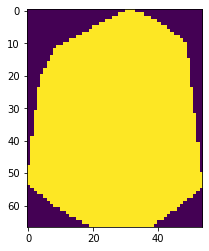

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage import io
from skimage.draw import draw, ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate
from skimage.filters import threshold_otsu

image = g
threshold_global_otsu = threshold_otsu(g)
image = g >= threshold_global_otsu
print(np.unique(image), np.shape(image))
image = io.imread("upwhite.png") > 0.5
image = image[0:180,0:180,0]
print(np.unique(image), np.shape(image))

label_img = label(image)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    if props.area > 1400:
        y0, x0 = props.centroid
        orientation = props.orientation
        x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
        y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
        x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
        y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

        ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
        ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
        ax.plot(x0, y0, '.g', markersize=15)
        
        rr,cc = draw.ellipse_perimeter(int(x0),int(y0),int(props.minor_axis_length*0.5),int(props.major_axis_length*0.5), orientation = props.orientation)
        angle = np.arctan2(rr - np.mean(rr), cc - np.mean(cc))
        sorted_by_angle = np.argsort(angle)
        rrs = rr[sorted_by_angle]
        ccs = cc[sorted_by_angle]
        plt.plot(rrs,ccs, color = 'orange', linewidth=2.5)

        minr, minc, maxr, maxc = props.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        #ax.plot(bx, by, '-b', linewidth=2.5)

plt.axis("off")
plt.show()

props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length',
                                                'area',
                                                 'filled_area',
                                                'convex_area',
                                                'eccentricity',
                                                'solidity',
                                                'euler_number',
                                                 "convex_image"
                                                ))
res = pd.DataFrame(props).sort_values(by=["area"], ascending=False).iloc[0]
print(res)
print(res["area"]/res["convex_area"])

plt.imshow(res["convex_image"])
plt.show()